In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2

## Loading Data 

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


## Pre processing

In [3]:
#Removing the columns which is irrelevant to the prediction
data_preprocessed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data_preprocessed.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [4]:
#Checking for the size and shape of the dataset
print(data_preprocessed.size)
print(data_preprocessed.shape)

110000
(10000, 11)


In [5]:
#Checking for the data types
data_preprocessed.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#Encoding 'Geography' and 'Gender'
data_preprocessed['Geography'] = LabelEncoder().fit_transform(data_preprocessed['Geography']) #Geography column
data_preprocessed['Gender'] = LabelEncoder().fit_transform(data_preprocessed['Gender']) #Gender Column
data_preprocessed.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1


In [7]:
#Overall statistical description of the relevant data
data_preprocessed.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Checking for noise
data_preprocessed.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Checking the distribution of output labels
data_preprocessed.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

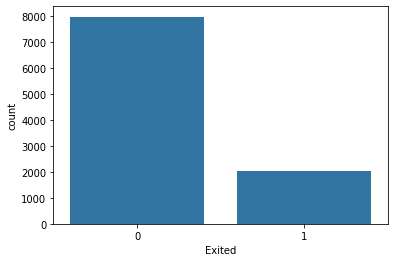

In [10]:
sns.countplot(x=data_preprocessed.Exited)
plt.show()

## Train Test Split

In [11]:
# Separate features and target
X = data_preprocessed.drop('Exited', axis=1) #Independent variables
y = data_preprocessed['Exited'] #Dependent/Target variable

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train/val/test split (80/10/10)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

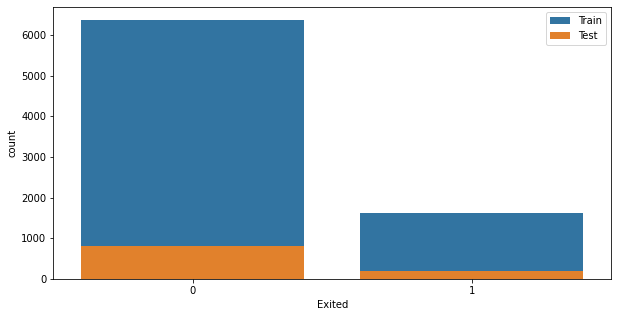

In [13]:
#Visualising the train-test split
plt.figure(figsize = (10, 5))
sns.countplot(x = y_train)
sns.countplot(x = y_test)
plt.legend(['Train', 'Test', 'Val'])
plt.show()

## Model Building

In [14]:
#Experiment Parameters
layer_configs = [
    (1, [128]),
    (2, [128, 64]),
    (3, [128, 64, 32])
]
epochs_list = [10, 20, 30]
activations = ['sigmoid', 'relu']
regularizations = [None, l1(0.001), l2(0.001)]
reg_names = ['None', 'L1', 'L2']
learning_rates = [0.1, 0.01, 0.001]

In [15]:
#Experiment Loop
results = []

for (num_layers, units) in layer_configs:
    for activation in activations:
        for reg, reg_name in zip(regularizations, reg_names):
            for lr in learning_rates:
                for epoch in epochs_list:

                    # Build model
                    model = Sequential()
                    model.add(Input(shape=(X_train.shape[1],)))
                    for i in range(num_layers):
                        model.add(Dense(units[i], activation=activation, kernel_regularizer=reg))
                    model.add(Dense(1, activation='sigmoid'))
                    opt = Adam(learning_rate=lr)
                    model.compile(optimizer=opt,
                                  loss='binary_crossentropy',
                                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

                    # Train
                    history = model.fit(
                        X_train, y_train,
                        epochs=epoch, batch_size=32, verbose=0,
                        validation_data=(X_val, y_val)
                    )

                    # Evaluate on test set
                    test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=0)

                    # Save results
                    results.append({
                        'Layers': num_layers,
                        'Units': units,
                        'Activation': activation,
                        'Regularization': reg_name,
                        'Learning Rate': lr,
                        'Epochs': epoch,
                        'Test Loss': test_loss,
                        'Test Accuracy': test_acc,
                        'Test Precision': test_prec,
                        'Test Recall': test_rec
                    })

In [16]:
#Results
results_df = pd.DataFrame(results)
print(results_df.head(10))

   Layers  Units Activation Regularization  Learning Rate  Epochs  Test Loss  \
0       1  [128]    sigmoid           None          0.100      10   0.343094   
1       1  [128]    sigmoid           None          0.100      20   0.356152   
2       1  [128]    sigmoid           None          0.100      30   0.365294   
3       1  [128]    sigmoid           None          0.010      10   0.355336   
4       1  [128]    sigmoid           None          0.010      20   0.340120   
5       1  [128]    sigmoid           None          0.010      30   0.343060   
6       1  [128]    sigmoid           None          0.001      10   0.432745   
7       1  [128]    sigmoid           None          0.001      20   0.392971   
8       1  [128]    sigmoid           None          0.001      30   0.363462   
9       1  [128]    sigmoid             L1          0.100      10   0.412810   

   Test Accuracy  Test Precision  Test Recall  
0          0.860        0.738806     0.485294  
1          0.848       

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8074 - loss: 0.5459 - val_accuracy: 0.8360 - val_loss: 0.4675
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.4299 - val_accuracy: 0.8240 - val_loss: 0.4431
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.3914 - val_accuracy: 0.8290 - val_loss: 0.4363
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.3797 - val_accuracy: 0.8400 - val_loss: 0.4175
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3728 - val_accuracy: 0.8390 - val_loss: 0.4159
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3663 - val_accuracy: 0.8350 - val_loss: 0.4127
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 0.3564 - val_accuracy: 0.8310 - val_loss: 0.4123
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8631 - loss: 0.3602 - val_accuracy: 0.

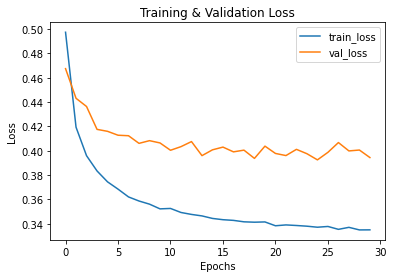

In [17]:
# Find best model (highest test accuracy)
idx_best = results_df['Test Accuracy'].idxmax()
best_cfg = results[idx_best]

# Re-train best model to get its history
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

for i in range(best_cfg['Layers']):
    model.add(Dense(best_cfg['Units'][i], activation=best_cfg['Activation'],
                    kernel_regularizer=None if best_cfg['Regularization']=='None'
                    else (l1(0.001) if best_cfg['Regularization']=='L1' else l2(0.001))))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=best_cfg['Learning Rate'])
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(
    X_train, y_train,
    epochs=best_cfg['Epochs'],
    batch_size=32,
    validation_data=(X_val, y_val)
)

plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The optimal hyperparameters, derived from the selected best model(w.r.t. Accuracy) is:

In [3]:
# Layers - 1
# Units - 128
# Activation - sigmoid
# Regularization - None
# Learning Rate - 0.010
# Epochs - 30